# Data loading and pre-processing

**Deep learing workflow:**

* **Data loading**
* **Data pre-processing**
* **Split the data** into training 65%/validation 15%/testing 20% sets
* **Build baseline model**(1 layer Perceptron and 2 layer Perceptron(MLP)):
  Define model architecture and hyperparameters
* **Train the training datasets**
* **Evaluate Performance** choose correct metric and apply to validation datasets
* **Fine tune the hyperparameters** until the performance becomes better


  ref: https://www.codecademy.com/article/deep-learning-workflow
  Chatgpt

In [1]:
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [2]:
import pandas as pd
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# Check if there is any missing value or some datatypes are not making sense
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
# Check if there is outliers
display(df.describe())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


As we check each column, obviously, some numbers seem don't make sense
* Pregnancies: Is max value 17 times possible?
* Glucose: Can the min value be 0?

    The 2-hour plasma glucose level <140 mg/dL is considered normal

    The 2-hour plasma glucose level of 140-199 mg/dL indicates impaired glucose tolerance

    The 2-hour plasma glucose level ≥200 mg/dL indicates diabetes

    Ref:https://www.ncbi.nlm.nih.gov/books/NBK532915/#:~:text=The%202%2Dhour%20plasma%20glucose,200%20mg%2FdL%20indicates%20diabetes

* BloodPressure: Can the min value be 0?
* SkinThickness: Can the min value be 0? Is max value 99 possible?
* Insulin: Can the min value be 0? Is max value 846 possible?
* BMI: Can the min value be 0? Is max value 67.1 possible?
* DiabetesPedigreeFunction
* Age
* Outcome

For those features with the min value 0, it does not make sense than the max values. So, I impute those value with median.

In [5]:
#check how many zero in total in each variable. Because zero value is obviously not making sense.
#Refering website:https://www.collaborat.com/pima-diabetes-data-discovery-predictive-model/
#Refering Chatgpt
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

print("The number of zeros of each feature")
for col in columns:
    print(f"{col}: {(df[col] == 0).sum()}")

The number of zeros of each feature
Pregnancies: 111
Glucose: 5
BloodPressure: 35
SkinThickness: 227
Insulin: 374
BMI: 11
DiabetesPedigreeFunction: 0
Age: 0


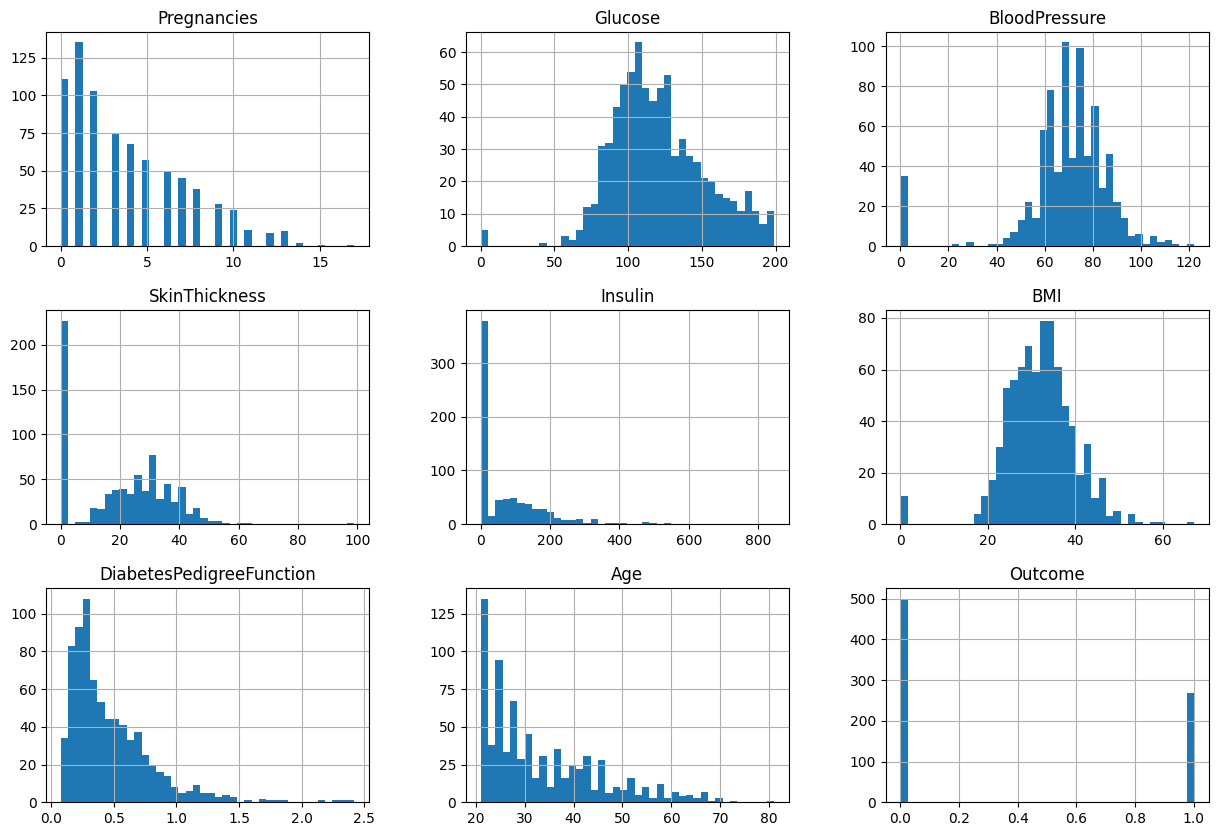

In [6]:
# Visualizing the features: indeed the 0 values in the distributions
diagram = df.hist(bins=40, figsize=(15, 10))

For obviously unreasonable data, for example, if the following features are equal to 0, then the subject may have died or disappeared:
* Glucose: Can the min value be 0?
* BloodPressure: Can the min value be 0?
* SkinThickness: Can the min value be 0?
* Insulin: Can the min value be 0?
* BMI: Can the min value be 0?

In [7]:
#impute all the zero value.
#Refering Chatgpt
import numpy as np
impute_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in impute_columns:

    df[col] = df[col].replace(0, np.nan)
    feature_median = df[col].median()
    df[col] = df[col].fillna(feature_median)

In [8]:
print("After imputing, the number of zeros of each feature")
for col in columns:
    print(f"{col}: {(df[col] == 0).sum()}")

After imputing, the number of zeros of each feature
Pregnancies: 0
Glucose: 0
BloodPressure: 0
SkinThickness: 0
Insulin: 0
BMI: 0
DiabetesPedigreeFunction: 0
Age: 0


In [9]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8.0,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,4.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


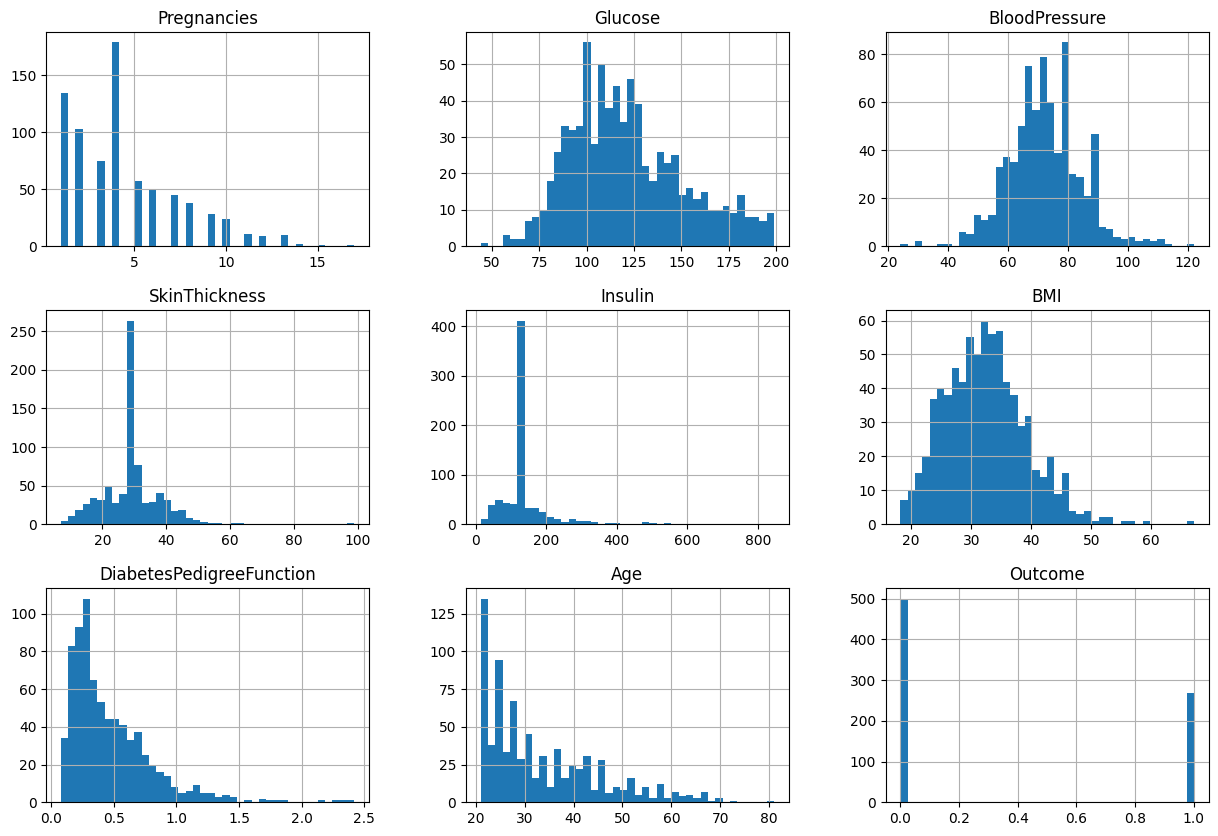

In [10]:
# Visualizing: to check if the 0 values successfully imputed
diagram = df.hist(bins=40, figsize=(15, 10))

According to the Histogram chart above, We need to scale the following features SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age because if the data has skewness, it will cause overfitting problems in subsequent modeling.

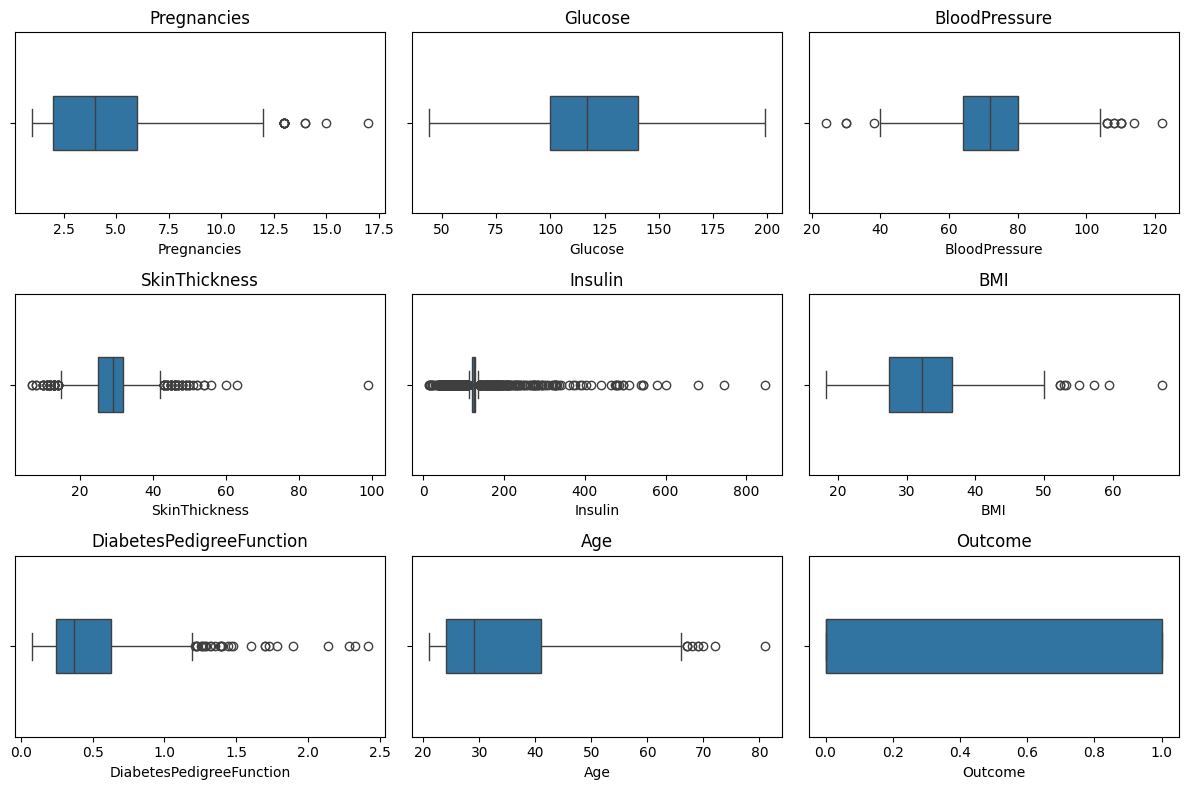

In [11]:
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings("ignore", category=FutureWarning)

features = df.select_dtypes(exclude="object").columns
plt.figure(figsize=(12, 8))

for i, col in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[col], width = 0.3)
    plt.title(col, loc='center')
plt.tight_layout()

From the perspective of boxplot, the outliers occur on most features, so we will not deal with outliers.

### Correlation between all features using heatmap

<Axes: >

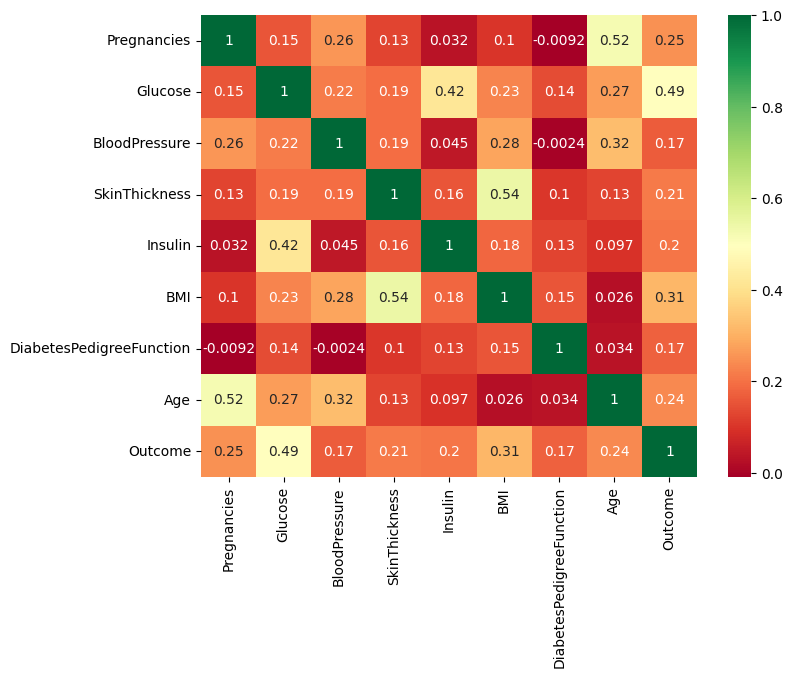

In [12]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot= True, cmap= 'RdYlGn')

## Scaling for skewness and choosing a proper scaling method for outliers.

I use Robust as my scaler because Robust's method can tolerate outliers. Obviously, we can see from the boxplots above that most features have outliers and we cannot easily replace or drop these outliers.

In [13]:
from sklearn.preprocessing import RobustScaler
import pandas as pd

features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

scaler = RobustScaler()

scaled_df = scaler.fit_transform(df[features])

scaled_df = pd.DataFrame(scaled_df, columns=features)

print(scaled_df)

     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0           0.50  0.765432          0.000       0.857143  0.000000  0.142857   
1          -0.75 -0.790123         -0.375       0.000000  0.000000 -0.626374   
2           1.00  1.629630         -0.500       0.000000  0.000000 -0.989011   
3          -0.75 -0.691358         -0.375      -0.857143 -5.391304 -0.461538   
4           0.00  0.493827         -2.000       0.857143  7.478261  1.186813   
..           ...       ...            ...            ...       ...       ...   
763         1.50 -0.395062          0.250       2.714286  9.565217  0.065934   
764        -0.50  0.123457         -0.125      -0.285714  0.000000  0.494505   
765         0.25  0.098765          0.000      -0.857143 -2.260870 -0.670330   
766        -0.75  0.222222         -0.750       0.000000  0.000000 -0.241758   
767        -0.75 -0.592593         -0.125       0.285714  0.000000 -0.208791   

     DiabetesPedigreeFunction       Age

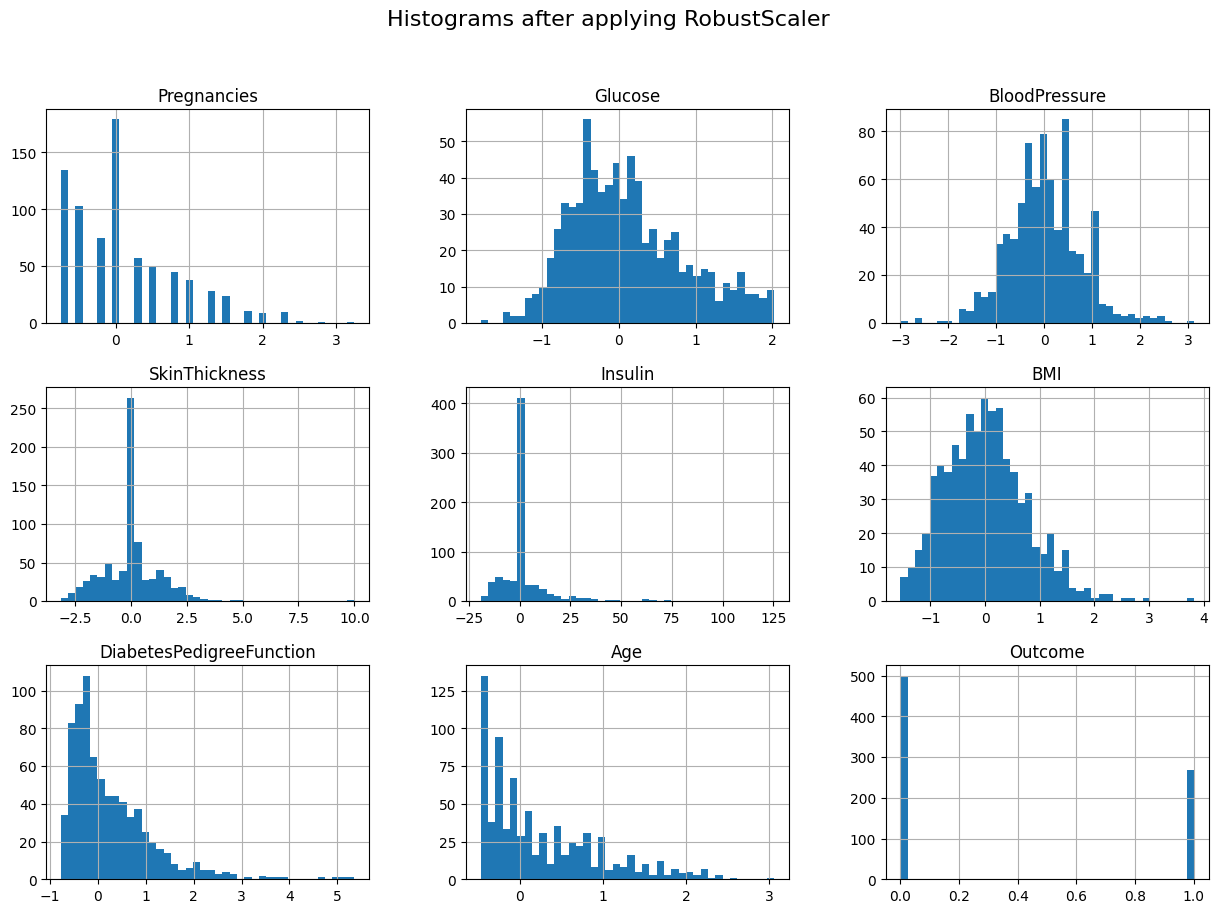

In [14]:
scaled_df.hist(bins=40, figsize=(15, 10))
plt.suptitle('Histograms after applying RobustScaler', fontsize=16)
plt.show()

It can be observed from the above figure that 0 is the baseline. Compared with the histogram, it had not been scaled. This time the distribution of all features is already symmetrical.

## Split the data into training 65% / validation 15% / testing 20% sets

In [15]:
# SETP1: Spliting training and testing sets
from sklearn.model_selection import train_test_split

# Assume X is my feature set, y is my outcome
X = scaled_df.drop('Outcome', axis=1)
y = scaled_df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)


In [16]:
# SETP2: Spliting training and validation sets
# later I will train the data with real training dataset "X_train_real"

X_train_real, X_val, y_train_real, y_val = train_test_split(X_train, y_train, test_size=0.15/(0.65 + 0.15), random_state=50)

# STEP3: Check my final data spliting outcome
print(f"Training_real size(65%): {X_train_real.shape}, Validation size(15%): {X_val.shape}, Testing size(20%): {X_test.shape}")

Training_real size(65%): (498, 8), Validation size(15%): (116, 8), Testing size(20%): (154, 8)


## Build the baseline Perceptron model and Train the training dataset

In [17]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, classification_report, f1_score, confusion_matrix

#build the baseline Perceptron model
model_1 = Perceptron()
model_1.fit(X_train_real, y_train_real) #fit the model with training set


Perceptron()

## Validate model_1

In [23]:
#Validating data and check Validation Accuracy
y_val_pred = model_1.predict(X_val) #Use the validation set to check the accuracy rate
accuracy_val_model1 = accuracy_score(y_val, y_val_pred)
print(f"Initial validation Accuracy: {accuracy_val_model1:.4f}")


Initial validation Accuracy: 0.6552


Obviously the validation accuracy is not high enough(60%), so we need to optimize the perceptron model.

In [24]:
import warnings
from sklearn.model_selection import GridSearchCV

warnings.filterwarnings("ignore", category=UserWarning)

# to find the hyperparameters
best_param_candidates = {
              'penalty': ['l2', 'l1'],
              'alpha': [0.0001, 0.001, 0.01],
              'max_iter': [20,50, 100, 200, 1000], #epochs
              'eta0': [0.0001, 0.001, 0.01, 0.1, 1], #learning rate
              }
param_search = GridSearchCV(Perceptron(), best_param_candidates, cv=5, verbose = 1)
param_search.fit(X_train_real, y_train_real)

print("Hyperparameters(best parameters combination):", param_search.best_params_)

model_1 = param_search.best_estimator_
y_val_pred = model_1.predict(X_val)
accuracy_val_model1 = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy after tuning: {accuracy_val_model1:.2f}")





Fitting 5 folds for each of 150 candidates, totalling 750 fits
Hyperparameters(best parameters combination): {'alpha': 0.01, 'eta0': 0.001, 'max_iter': 20, 'penalty': 'l1'}
Validation Accuracy after tuning: 0.74


In [25]:
model_1 = Perceptron(penalty='l1', alpha=0.01, eta0=0.001, max_iter=20, warm_start=True, tol=None)
epochs_num_model1 = 30
early_stop = 5
best_val_accuracy = 0
counter_early_stop = 0
accuracies_train_model1 = []
accuracies_valid_model1 = []

for epoch in range(epochs_num_model1):
    model_1.fit(X_train_real, y_train_real)  # Fit the model on the training data
    y_train_pred = model_1.predict(X_train_real)
    y_val_pred = model_1.predict(X_val)

    # Calculate training and validation accuracy
    training_accuracy = accuracy_score(y_train_real, y_train_pred)
    valid_accuracy = accuracy_score(y_val, y_val_pred)

    accuracies_train_model1.append(training_accuracy)
    accuracies_valid_model1.append(valid_accuracy)

    print(f"Epoch {epoch + 1}, Training Accuracy: {training_accuracy:.4f}, Validation Accuracy: {valid_accuracy:.4f}")


    if valid_accuracy > best_val_accuracy:
        best_val_accuracy = valid_accuracy
        counter_early_stop = 0
    else:
        counter_early_stop += 1


    if counter_early_stop >= early_stop:
        print(f"Early stopping triggered after epoch {epoch + 1}")
        break

Epoch 1, Training Accuracy: 0.7711, Validation Accuracy: 0.7414
Epoch 2, Training Accuracy: 0.7028, Validation Accuracy: 0.7414
Epoch 3, Training Accuracy: 0.7289, Validation Accuracy: 0.6897
Epoch 4, Training Accuracy: 0.7088, Validation Accuracy: 0.7241
Epoch 5, Training Accuracy: 0.6988, Validation Accuracy: 0.6983
Epoch 6, Training Accuracy: 0.7771, Validation Accuracy: 0.7672
Epoch 7, Training Accuracy: 0.7088, Validation Accuracy: 0.6552
Epoch 8, Training Accuracy: 0.7550, Validation Accuracy: 0.7069
Epoch 9, Training Accuracy: 0.7791, Validation Accuracy: 0.7759
Epoch 10, Training Accuracy: 0.7390, Validation Accuracy: 0.7241
Epoch 11, Training Accuracy: 0.7249, Validation Accuracy: 0.7241
Epoch 12, Training Accuracy: 0.6807, Validation Accuracy: 0.6897
Epoch 13, Training Accuracy: 0.7149, Validation Accuracy: 0.6897
Epoch 14, Training Accuracy: 0.7129, Validation Accuracy: 0.6552
Early stopping triggered after epoch 14


##Test model_1 Perceptron

Perceptron Test Accuracy: 0.6623
F1 Score on Test Data: 0.4694


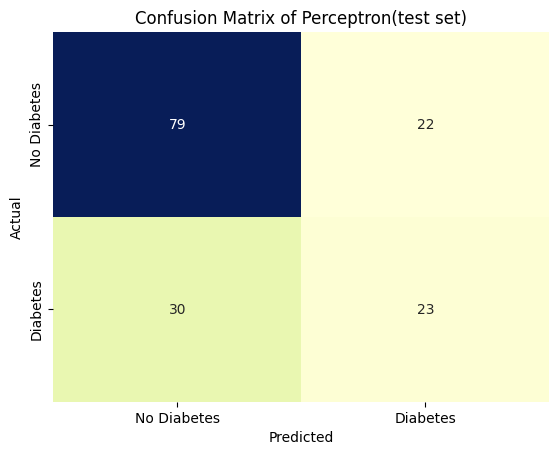

----------------------------------------------------------------
False Negative is  30


In [26]:

y_test_pred = model_1.predict(X_test)
accuracy_test_model1 = accuracy_score(y_test, y_test_pred)
print(f"Perceptron Test Accuracy: {accuracy_test_model1:.4f}")

f1 = f1_score(y_test, y_test_pred)
print(f"F1 Score on Test Data: {f1:.4f}")

# confusion matrix
conf_matrix_model1 = confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_matrix_model1, annot=True, fmt="d", xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"], cmap="YlGnBu", cbar = False)
plt.title("Confusion Matrix of Perceptron(test set)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("----------------------------------------------------------------")
FN = conf_matrix_model1[1, 0]
print("False Negative is ", FN)